In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind


In [7]:
#Carga de datos y análisis visual de su contenido.
df = pd.read_csv("NBA_2024_per_game(03-01-2024).csv")
df.head(5)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,C-PF,24,TOT,26,0,17.2,3.0,6.6,0.453,...,0.571,2.0,3.4,5.3,1.7,0.6,0.5,1.1,1.6,7.4
1,Precious Achiuwa,C,24,TOR,25,0,17.5,3.1,6.8,0.459,...,0.571,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7
2,Precious Achiuwa,PF,24,NYK,1,0,9.0,0.0,2.0,0.000,...,NaN,1.0,2.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0
3,Bam Adebayo,C,26,MIA,23,23,34.1,8.0,15.7,0.506,...,0.777,2.1,8.3,10.4,4.0,1.1,1.0,2.7,2.4,22.0
4,Ochai Agbaji,SG,23,UTA,34,10,21.1,2.6,5.7,0.451,...,0.714,0.8,1.7,2.5,1.0,0.6,0.5,0.7,1.5,6.6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538 entries, 0 to 537
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  538 non-null    object 
 1   Pos     538 non-null    object 
 2   Age     538 non-null    int64  
 3   Tm      538 non-null    object 
 4   G       538 non-null    int64  
 5   GS      538 non-null    int64  
 6   MP      538 non-null    float64
 7   FG      538 non-null    float64
 8   FGA     538 non-null    float64
 9   FG%     530 non-null    float64
 10  3P      538 non-null    float64
 11  3PA     538 non-null    float64
 12  3P%     489 non-null    float64
 13  2P      538 non-null    float64
 14  2PA     538 non-null    float64
 15  2P%     521 non-null    float64
 16  eFG%    530 non-null    float64
 17  FT      538 non-null    float64
 18  FTA     538 non-null    float64
 19  FT%     476 non-null    float64
 20  ORB     538 non-null    float64
 21  DRB     538 non-null    float64
 22  TR

In [8]:
# NaNs por columna
nans_col = df.isna().sum()
nans_col

Player     0
Pos        0
Age        0
Tm         0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%        8
3P         0
3PA        0
3P%       49
2P         0
2PA        0
2P%       17
eFG%       8
FT         0
FTA        0
FT%       62
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
dtype: int64

In [11]:
#Eliminar las 3 columnas con mayor número de NaNs
columns_borrar = ['3P%', '2P%', 'FT%']
df = df.drop(columns=columns_borrar)

In [ ]:
#Comprobar el número de valores únicos por columna
unique_counts = df.nunique()
print("Count of unique values per column:")
print(unique_counts)

Count of unique values per column:
Player    518
Pos         8
Age        21
Tm         31
G          35
GS         36
MP        272
FG        100
FGA       174
FG%       235
3P         40
3PA        87
2P         80
2PA       126
eFG%      240
FT         61
FTA        73
ORB        38
DRB        79
TRB        98
AST        80
STL        23
BLK        25
TOV        40
PF         42
PTS       201
dtype: int64


In [140]:
#Extracción de los jugadores con las estadísticas más altas para las columnas de interés y comparación con los jugadores de los Chicago Bulls con las estadísiticas más altas.
# Lista de stats para analizar.
columns = ['3P', '2P', 'DRB','STL', 'BLK','PTS']

# Crea un diccionario para guardar al mejor jugador por stat.
mejor = {}

for stat in columns:
    # Obtiene el mejor jugador por stat
    mejor[stat] = df.loc[df[stat].idxmax()][['Player', 'Tm', stat]]

# Muestra los resultados
for stat in columns:
    print(f"Mejor jugador {stat}:")
    print(mejor[stat])
    print("\n" + "-"*50)



Mejor jugador 3P:
Player    Stephen Curry
Tm                  GSW
3P                  4.7
Name: 113, dtype: object

--------------------------------------------------
Mejor jugador 2P:
Player    Giannis Antetokounmpo
Tm                          MIL
2P                         11.1
Name: 11, dtype: object

--------------------------------------------------
Mejor jugador DRB:
Player    Nikola Jokić
Tm                 DEN
DRB                9.2
Name: 242, dtype: object

--------------------------------------------------
Mejor jugador STL:
Player    Shai Gilgeous-Alexander
Tm                            OKC
STL                           2.6
Name: 161, dtype: object

--------------------------------------------------
Mejor jugador BLK:
Player    Brook Lopez
Tm                MIL
BLK               3.1
Name: 282, dtype: object

--------------------------------------------------
Mejor jugador PTS:
Player    Joel Embiid
Tm                PHI
PTS              35.0
Name: 137, dtype: object

-------

In [141]:
# Filtrar los jugadores de los Bulls para cada columna
chicago_bulls_players = df[df['Tm'] == 'CHI']

# Creo un diccionario para guardar los jugadores por cada stats
best_bulls_players = {}

for stat in columns:
    # Obtiene el jugador de los Bulls con el valor más alto
    best_bulls_players[stat] = chicago_bulls_players.loc[chicago_bulls_players[stat].idxmax()][['Player', 'Tm', stat]]

# Muestra los resultados
for stat in columns:
    print(f"Mejor jugador de los Chicago Bulls {stat}:")
    print(best_bulls_players[stat])
    print("\n" + "-"*50)

Mejor jugador de los Chicago Bulls 3P:
Player    Coby White
Tm               CHI
3P               2.9
Name: 510, dtype: object

--------------------------------------------------
Mejor jugador de los Chicago Bulls 2P:
Player    DeMar DeRozan
Tm                  CHI
2P                  6.8
Name: 119, dtype: object

--------------------------------------------------
Mejor jugador de los Chicago Bulls DRB:
Player    Nikola Vučević
Tm                   CHI
DRB                  7.6
Name: 492, dtype: object

--------------------------------------------------
Mejor jugador de los Chicago Bulls STL:
Player    Alex Caruso
Tm                CHI
STL               1.2
Name: 91, dtype: object

--------------------------------------------------
Mejor jugador de los Chicago Bulls BLK:
Player    Patrick Williams
Tm                     CHI
BLK                    0.9
Name: 523, dtype: object

--------------------------------------------------
Mejor jugador de los Chicago Bulls PTS:
Player    DeMar DeRoz

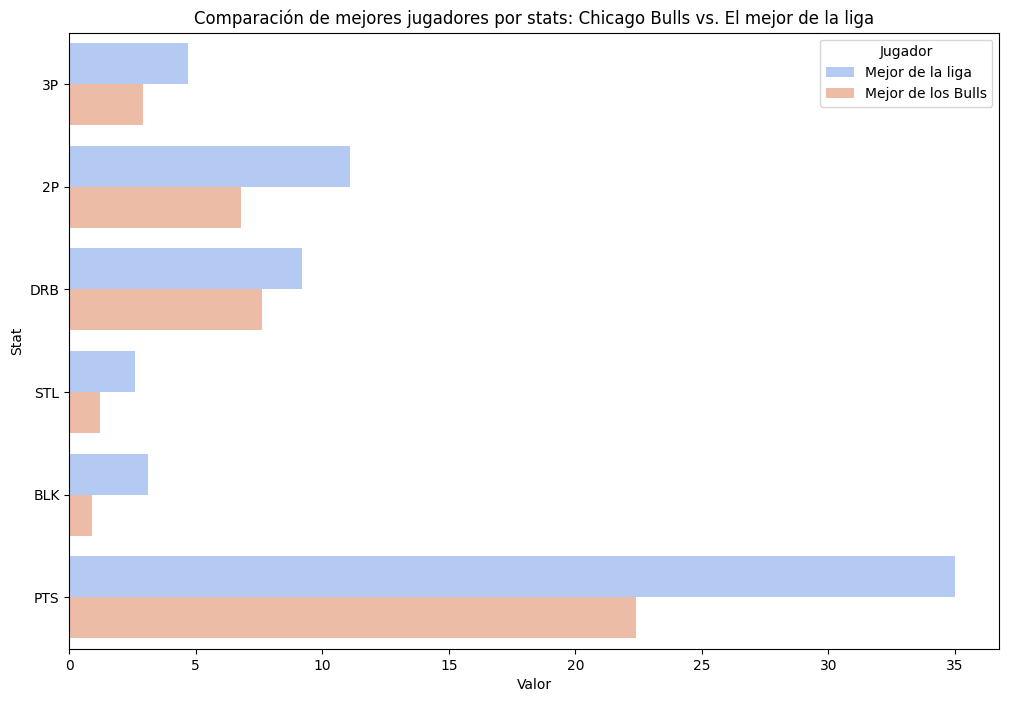

In [143]:
# Variable para guardar el listado de jugadores
comparacion_df = []

for stat in columns:
    # Obtiene para cada stat el mejor jugador de los Bulls y el mejor jugador de la liga
    league_best_player = mejor[stat]
    bulls_best_player = best_bulls_players[stat]
    
    # Crea un diccionario para guardar la información y mostrarla.
    comparacion_df.append({
        'Stat': stat,
        'Player': league_best_player['Player'],
        'Tm': league_best_player['Tm'],
        'Value': league_best_player[stat],
        'Type': 'Mejor de la liga'
    })
    
    comparacion_df.append({
        'Stat': stat,
        'Player': bulls_best_player['Player'],
        'Tm': bulls_best_player['Tm'],
        'Value': bulls_best_player[stat],
        'Type': 'Mejor de los Bulls'
    })

# Se convierte la lista en un dataframe de pandas
comparacion_df = pd.DataFrame(comparacion_df)

# Plot de los datos
plt.figure(figsize=(12, 8))
sns.barplot(x='Value', y='Stat', hue='Type', data=comparacion_df, palette='coolwarm')

# Títulos y texto del plot
plt.xlabel('Valor')
plt.ylabel('Stat')
plt.title('Comparación de mejores jugadores por stats: Chicago Bulls vs. El mejor de la liga')
plt.legend(title='Jugador', loc='upper right')

# Plot
plt.savefig("comparacion_jugadores1.png", dpi=300, bbox_inches='tight')
plt.show()


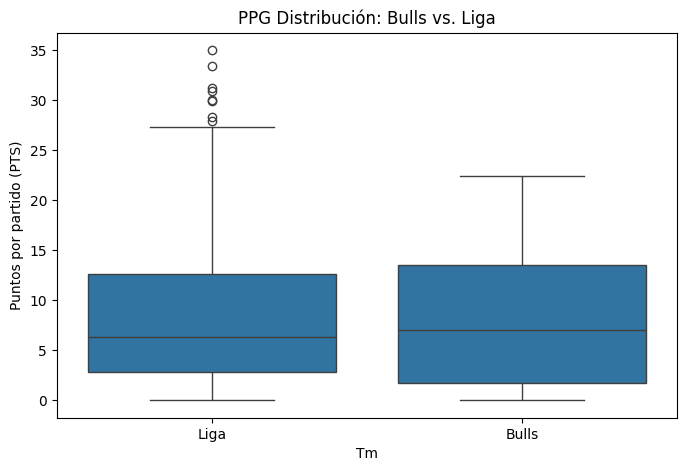

In [136]:
#Análisis estadísticas ofensivas:
#Análisis univariante de la columna PTS para comparar la media de puntos por partido de los jugadores de los Bulls vs la media de puntos por partido del resto de equipos de la liga.
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Tm'].apply(lambda x: 'Bulls' if x == 'CHI' else 'Liga'), y=df['PTS'])
plt.title('PPG Distribución: Bulls vs. Liga')
plt.ylabel('Puntos por partido (PTS)')
plt.show()


Estadísticas descriptivas:
PPG Bulls Media: 8.55, Std: 7.68
PPG Boston Media: 9.22, Std: 8.30

T-Test Resultado:
T-Estadísticas: -0.23, P-Value: 0.8183


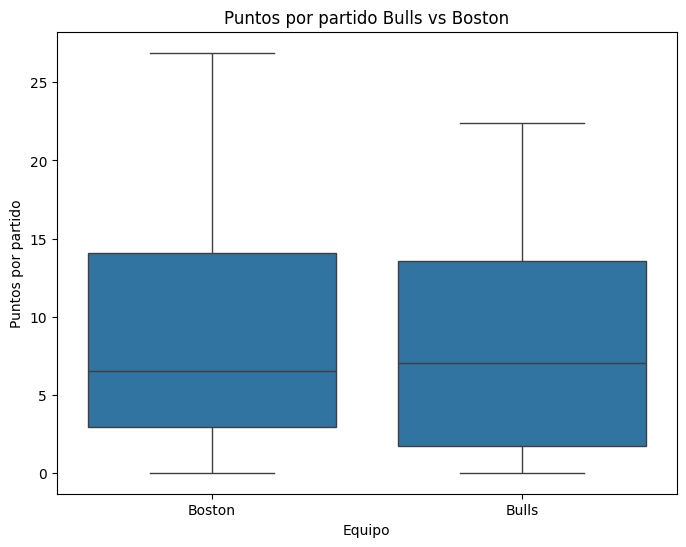

In [49]:
#Análisis univariante de la columna PTS para comparar la media de puntos por partido de los jugadores de los Bulls vs la media de puntos por partido del campeón de la conferencia Este Boston Celtics.
east_winner = 'BOS'
bulls = df[df['Tm'] == 'CHI']
east_team = df[df['Tm'] == east_winner]

# Visualización combinada de los datos
comparison_df = df[df['Tm'].isin(['CHI', east_winner])].copy()
comparison_df['Equipo'] = comparison_df['Tm'].apply(lambda x: 'Bulls' if x == 'CHI' else 'Boston')

# Estadísticas descriptivas
bulls_ppg_mean = bulls['PTS'].mean()
east_ppg_mean = east_team['PTS'].mean()

print("Estadísticas descriptivas:")
print(f"PPG Bulls Media: {bulls_ppg_mean:.2f}, Std: {bulls['PTS'].std():.2f}")
print(f"PPG Boston Media: {east_ppg_mean:.2f}, Std: {east_team['PTS'].std():.2f}")

# T-test
t_stat, p_value = ttest_ind(bulls['PTS'], east_team['PTS'], equal_var=False)
print("\nT-Test Resultado:")
print(f"T-Estadísticas: {t_stat:.2f}, P-Value: {p_value:.4f}")

# Visualización
plt.figure(figsize=(8, 6))
sns.boxplot(data=comparison_df, x='Equipo', y='PTS')
plt.title('Puntos por partido Bulls vs Boston')
plt.ylabel('Puntos por partido')
plt.show()


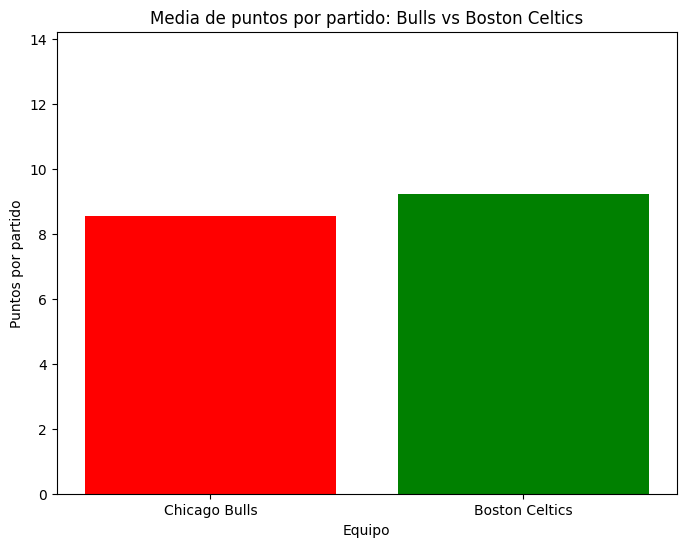

In [55]:
#Gráfico de barras para mostrar la diferencia de forma más accesible.
# Calcula la media de los puntos por partido para cada equipo.
teams_ppg = {
    'Chicago Bulls': bulls['PTS'].mean(),
    'Boston Celtics': east_team['PTS'].mean()
}

plt.figure(figsize=(8, 6))
plt.bar(teams_ppg.keys(), teams_ppg.values(), color=['red', 'green'])
plt.title('Media de puntos por partido: Bulls vs Boston Celtics')
plt.ylabel('Puntos por partido')
plt.xlabel('Equipo')
plt.ylim(0, max(teams_ppg.values()) + 5)
plt.savefig("ppg_bulls_bos.png", dpi=300, bbox_inches='tight')
plt.show()


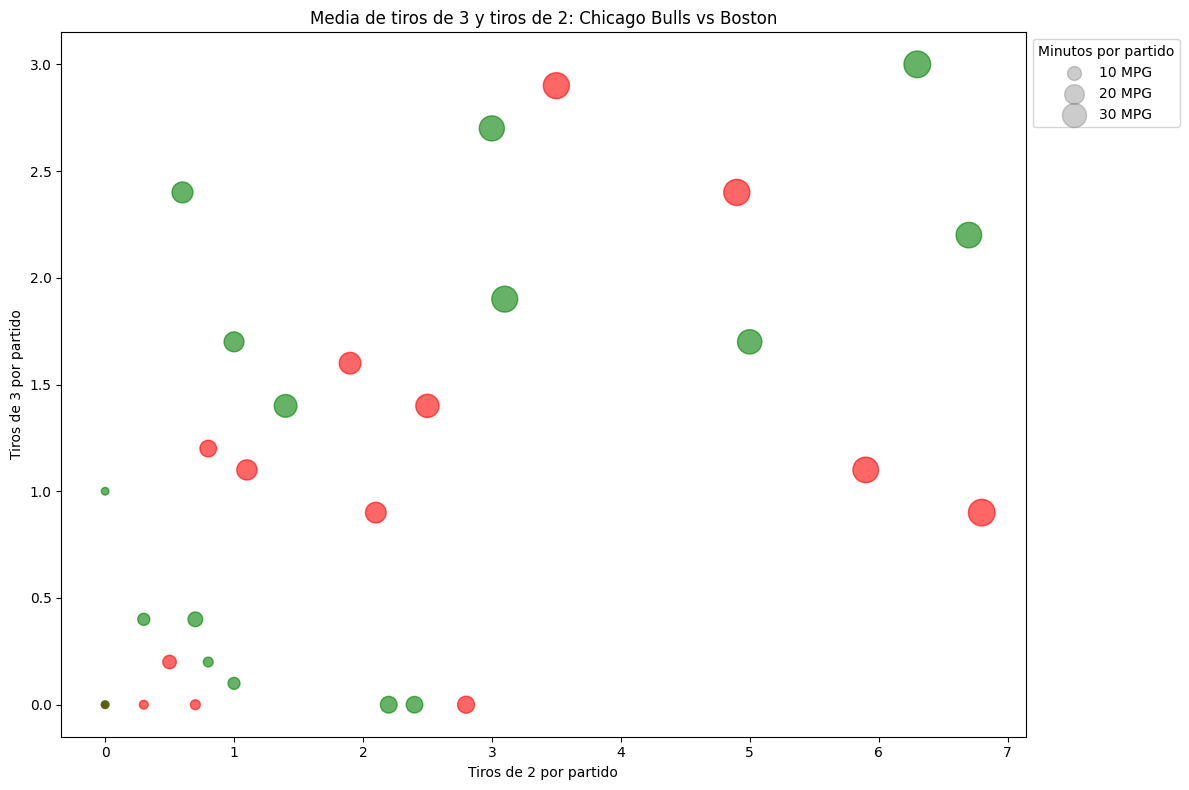

In [137]:
#Scatterplot 2P y 3P Bulls vs Boston, incluyendo los minutos jugados por partido
plt.figure(figsize=(12, 8))

# Plot para los Bulls
bulls_scatter = plt.scatter(bulls['2P'], bulls['3P'], 
                          s=bulls['MP']*10,  # Multiplico por 10 para que las burbujas sean más visibles
                          color='red', 
                          alpha=0.6,
                          label='Chicago Bulls')

# Plot para Boston
boston_scatter = plt.scatter(east_team['2P'], east_team['3P'], 
                           s=east_team['MP']*10,
                           color='green', 
                           alpha=0.6,
                           label='Boston')
plt.title('Media de tiros de 3 y tiros de 2: Chicago Bulls vs Boston')
plt.xlabel('Tiros de 2 por partido')
plt.ylabel('Tiros de 3 por partido')
plt.legend()

# Leyenda
legend = [plt.scatter([], [], s=val*10, 
                             color='gray', 
                             alpha=0.4, 
                             label=f'{val} MPG') 
                  for val in [10, 20, 30]]
plt.legend(handles=legend, 
          title='Minutos por partido',
          loc='upper left',
          bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.savefig("3p_fg_bulls_bos.png", dpi=300, bbox_inches='tight')
plt.show()


<Figure size 1500x800 with 0 Axes>

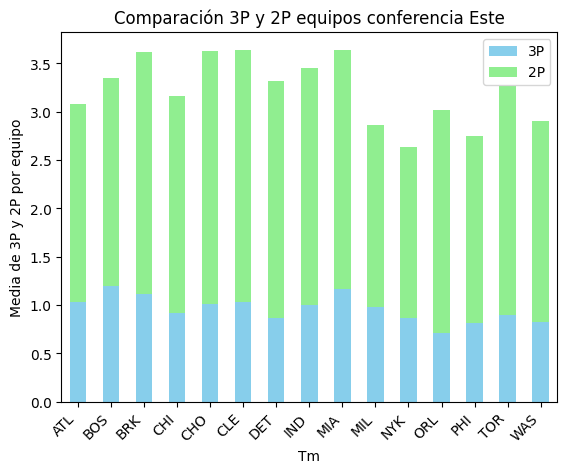

In [ ]:
#Gráfico de barras para comparar los 3P y 2P de los Bulls vs el resto de equipos de la conferencia Este.

# Lista de equipos de la conferencia Este
eastern_teams = ['CHI', 'MIL', 'BOS', 'PHI', 'CLE', 'MIA', 'IND', 'TOR', 'NYK', 'ATL', 'BRK', 'ORL','CHO','WAS','DET',]

# Filtro el dataset para solo mostrar los equipos de la lista.
eastern_df = df[df['Tm'].isin(eastern_teams)]

# Calculo la media de 2P y 3P de cada equipo.
team_comparison = eastern_df.groupby('Tm')[['3P', '2P']].mean().reset_index()

plt.figure(figsize=(15, 8))
team_comparison.set_index('Tm').plot(kind='bar', stacked=True, color=['skyblue', 'lightgreen'])
plt.title('Comparación 3P y 2P equipos conferencia Este')
plt.ylabel('Media de 3P y 2P por equipo')
plt.xticks(rotation=45, ha="right")
plt.savefig("3p_fg_eastern_conference.png", dpi=300, bbox_inches='tight')
plt.show()


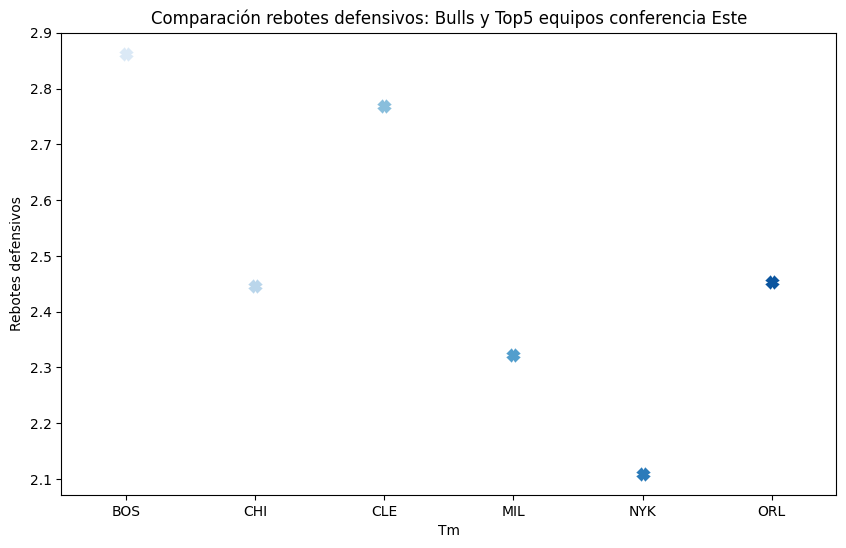

In [139]:
#Análisis estadísticas defensivas
#Gráfico de puntos para comparar los rebotes defensivos de los jugadores de los Bulls vs los del top 5 de equipos de la conferencia Este.

# Lista para definir los equipos elegidos.
selected_teams = ['CHI', 'BOS', 'NYK', 'ORL', 'CLE', 'MIL']

# Filtramos el dataset para incluir solo esos equipos
filtered_df = df[df['Tm'].isin(selected_teams)]

# Agrupamos por equipo y calculamos la media de rebotes defensivos.
drb_comparison = filtered_df.groupby('Tm')['DRB'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.pointplot(x='Tm', y='DRB', data=drb_comparison, hue='Tm', palette='Blues', markers='X', linestyles='dashed', legend=False)
plt.title('Comparación rebotes defensivos: Bulls y Top5 equipos conferencia Este')
plt.ylabel('Rebotes defensivos')
plt.savefig("drb_comparison.png", dpi=300, bbox_inches='tight')
plt.show()

Missing:
Tm           0
STL          0
BLK          0
Team_Type    0
Rank         0
Size         0
dtype: int64
STL Range: 0.4722222222222222 - 0.7000000000000001
BLK Range: 0.21428571428571427 - 0.5166666666666667


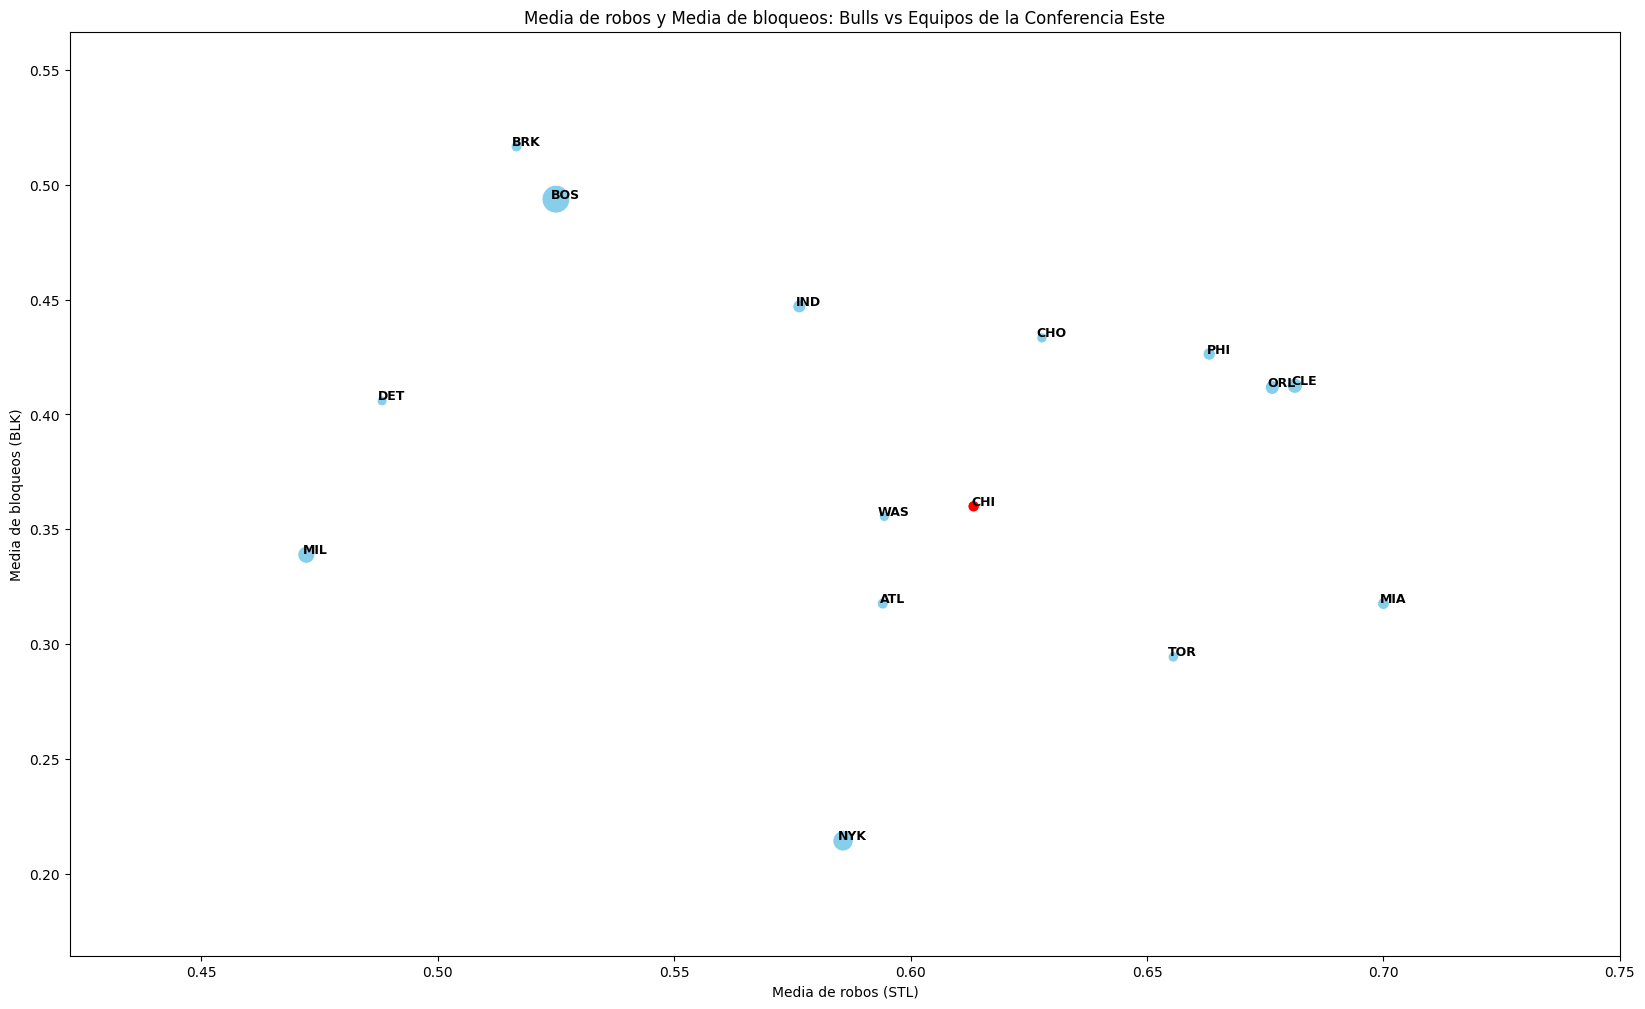

In [128]:
plt.clf()
plt.close('all')

# Clasificaciones en la conferencia Este en la temporada 23-24
eastern_conference_rankings = {
    'BOS': 1, 'NYK': 2, 'MIL': 3, 'CLE': 4, 'ORL': 5, 'IND': 6, 'PHI': 7, 'MIA': 8,
    'CHI': 9, 'ATL': 10, 'BRK': 11, 'TOR': 12, 'CHO': 13, 'WAS': 14, 'DET': 15
}

# Se agrupan los datos por equipo y se calculan las medias de robos y bloqueos
medias_s_b = eastern_df.groupby('Tm')[['STL', 'BLK']].mean().reset_index()

# Se crea una columna nueva para diferenciar a los Bulls del resto de equipos
medias_s_b['Team_Type'] = medias_s_b['Tm'].apply(lambda x: 'Bulls' if x == 'CHI' else 'Eastern Conference')

# Mapear la posición de cada equipo en la conferencia Este
medias_s_b['Rank'] = medias_s_b['Tm'].map(eastern_conference_rankings)

# Ajustar el tamaño de los puntos según el ranking
medias_s_b['Size'] = 300 / medias_s_b['Rank'] 

# Debugging: checkear si hay datos que faltan
print("Missing:")
print(medias_s_b.isnull().sum())

print("STL Range:", medias_s_b['STL'].min(), "-", medias_s_b['STL'].max())
print("BLK Range:", medias_s_b['BLK'].min(), "-", medias_s_b['BLK'].max())

# Crear el scatterplot
plt.figure(figsize=(20, 12))
sns.scatterplot(data=medias_s_b, x='STL', y='BLK', hue='Team_Type',
                palette={'Bulls': 'red', 'Eastern Conference': 'skyblue'},
                size='Size', sizes=(50, 400), legend=None)

# Añadir los nombres de los equipos al gráfico
for i in range(len(medias_s_b)):
    plt.text(
        medias_s_b['STL'][i] + 0.002,  # Small horizontal offset
        medias_s_b['BLK'][i] + 0.002,  # Small vertical offset
        medias_s_b['Tm'][i],          # Team name
        fontsize=9, 
        ha='center', 
        va='center',
        color='black', 
        weight='semibold'
    )

# Ajustar los límites de los ejes para asegurar que todos los puntos y etiquetas sean visibles
plt.xlim(medias_s_b['STL'].min() - 0.05, medias_s_b['STL'].max() + 0.05)
plt.ylim(medias_s_b['BLK'].min() - 0.05, medias_s_b['BLK'].max() + 0.05)

# Añadir título y etiquetas
plt.title('Media de robos y Media de bloqueos: Bulls vs Equipos de la Conferencia Este')
plt.xlabel('Media de robos (STL)')
plt.ylabel('Media de bloqueos (BLK)')

# Guardar el gráfico
plt.savefig("s_b_comparison_with_rankings.png", dpi=300, bbox_inches='tight')
plt.show()



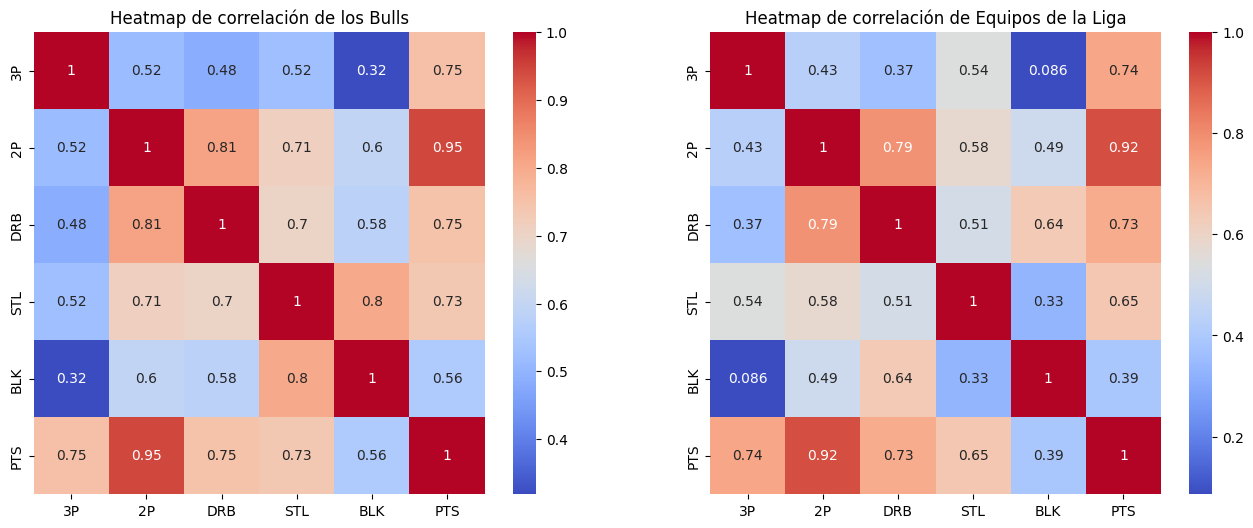

In [144]:
#Análisis multivariante mediante un mapa de calor para analizar la correlación entre las stats ofensivas y defensivas de los Bulls vs el resto de equipos de la liga.

# Heatmap de correlación: se seleccionan las columnas de interés y se dividen entre los Bulls y el resto de equipos.
bulls_corr = df[df['Tm'] == 'CHI'][['3P', '2P', 'DRB','STL', 'BLK', 'PTS']].corr()
league_corr = df[df['Tm'] != 'CHI'][['3P', '2P', 'DRB','STL', 'BLK', 'PTS']].corr()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(bulls_corr, annot=True, cmap='coolwarm', ax=axes[0])
axes[0].set_title("Heatmap de correlación de los Bulls")

sns.heatmap(league_corr, annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title("Heatmap de correlación de Equipos de la Liga")
plt.savefig("correlation_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()
